In [1]:
### Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn import cross_validation
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from scipy.signal import argrelextrema

/home/deva/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### Import Data Files
df_satData = pd.read_csv('distSatellite_withLabels.csv')

In [3]:
### List of labels
lis_labelsAll = ['MSL_1','MSL_2','MSL_3','MSW_1','MSW_2','MSW_3','CHH_1','CHH_2','CHH_3','FC_1','FC_2','FC_3','BF_1','BF_2','BF_3','EMP_1','EMP_2','EMP_3']

### List of useful Labels
lis_labels= ['EMP_1','EMP_2','EMP_3']

## Building features from night light data

In [4]:
var = []
for i in range(64):
    var.append('DN_' + str(i).zfill(2))

df_satData['Area'] = 0
for i in var:
    df_satData['Area']=df_satData['Area'] + df_satData[i]
df_satData['Area'] = df_satData['Area'].replace(0,1)

for i in var:
    df_satData['p'+i] = (df_satData[i])/(df_satData['Area']*1.0)

for i,j in enumerate(var):
    df_satData['q'+j] = df_satData[j]*(i+1)

var3 = []
for i in var:
    var3.append('p'+i)
#for i in var:
#    var1.append(i)
#for i in var:
#    var1.append('r'+i)
#for i in var:
#    var1.append('rp'+i)

for i in var:
    var3.append('q'+i)
#for i in var:
#    var1.append('rq'+i)

## Appling Pca to matrix formed from features of nightlight data

In [5]:
X = df_satData.loc[:,var3].values

X = preprocessing.scale(X)

pca= PCA(svd_solver='full')
pca.fit(X, y=None )
a= pca.explained_variance_ratio_
for i in range(len(a)):
    a[i]=round(a[i],3)
    print(a)
#print(pd.DataFrame(pca.components_))
###Creating the array for clustering using transformed variables

[  4.34000000e-01   1.70538598e-01   8.16341746e-02   4.38321693e-02
   3.33809067e-02   2.29061274e-02   2.19606934e-02   1.97014456e-02
   1.55440778e-02   1.31986181e-02   1.23447374e-02   1.06876621e-02
   8.79890942e-03   7.69917806e-03   6.69302029e-03   6.32969072e-03
   5.36057774e-03   4.63210030e-03   4.35087129e-03   4.07006786e-03
   3.75323223e-03   3.31111730e-03   3.14984897e-03   2.90464388e-03
   2.72282412e-03   2.60668193e-03   2.34099242e-03   2.23867272e-03
   2.14426217e-03   1.99856007e-03   1.96014371e-03   1.86519805e-03
   1.77097752e-03   1.71273238e-03   1.68701854e-03   1.61318770e-03
   1.58126419e-03   1.45821638e-03   1.44543208e-03   1.38162601e-03
   1.27644689e-03   1.26214243e-03   1.22264493e-03   1.14648585e-03
   1.10872933e-03   1.06529548e-03   1.01752804e-03   1.00368058e-03
   9.95837503e-04   9.47255407e-04   9.21215164e-04   8.86912693e-04
   8.65704272e-04   8.38672181e-04   7.94339147e-04   7.46709878e-04
   6.88186497e-04   6.81895705e-04

[  4.34000000e-01   1.71000000e-01   8.20000000e-02   4.40000000e-02
   3.30000000e-02   2.30000000e-02   2.20000000e-02   2.00000000e-02
   1.60000000e-02   1.30000000e-02   1.20000000e-02   1.10000000e-02
   9.00000000e-03   8.00000000e-03   7.00000000e-03   6.00000000e-03
   5.00000000e-03   5.00000000e-03   4.00000000e-03   4.00000000e-03
   4.00000000e-03   3.00000000e-03   3.00000000e-03   3.00000000e-03
   3.00000000e-03   3.00000000e-03   2.00000000e-03   2.00000000e-03
   2.00000000e-03   2.00000000e-03   2.00000000e-03   2.00000000e-03
   2.00000000e-03   2.00000000e-03   2.00000000e-03   2.00000000e-03
   2.00000000e-03   1.00000000e-03   1.00000000e-03   1.00000000e-03
   1.00000000e-03   1.00000000e-03   1.00000000e-03   1.00000000e-03
   1.00000000e-03   1.00000000e-03   1.00000000e-03   1.00000000e-03
   1.00000000e-03   1.00000000e-03   1.00000000e-03   1.00000000e-03
   1.00000000e-03   1.00000000e-03   1.00000000e-03   1.00000000e-03
   1.00000000e-03   1.00000000e-03

In [6]:
 0.434 +0.171+ 0.082+0.044 + 0.033 + 0.023 + 0.022 + 0.02+   0.016 + 0.013

0.8580000000000001

In [7]:
X1=pca.fit_transform(X)
X1=X1[:,0:8]
#X=normalize(X,axis=0)

In [8]:
np.shape(X1)
[m,k] = np.shape(X1)

col_X1 = []
for j in range(k):
    col_X1.append('pca_'+str(j))

In [9]:
df_pcaNl = pd.DataFrame(X1,columns=col_X1)

## Building features out of Modis Data

In [10]:
df_satData['Natural']= 0
for i in ['Water','Evergreen Needleleaf forest','Evergreen Broadleaf forest','Deciduous Needleleaf forest','Deciduous Broadleaf forest','Mixed forest','Closed shrublands','Open shrublands','Woody savannas','Savannas','Grasslands','Permanent wetlands','Snow and ice']:
    df_satData['Natural']=df_satData['Natural']+df_satData[i]
    
df_satData['Urban and built-up']=df_satData['Urban and built-up']+1
df_satData['CropRatio']=(df_satData['Croplands']+df_satData['Cropland/Natural vegetation mosaic'])/df_satData['Area']
df_satData['AvgUrbanNTL']=df_satData['sum']/df_satData['Urban and built-up']
df_satData['UrbanRatio']= df_satData['Urban and built-up']/df_satData['Area']
    
df_satData['CropRemainRatio']=(df_satData['Croplands']+df_satData['Cropland/Natural vegetation mosaic'])/(df_satData['Area']-df_satData['Natural'])
df_satData['UrbanRemainRatio']=df_satData['Urban and built-up']/(df_satData['Area']-df_satData['Natural'])
#df_satData['UrbanRatio']=df_satData['UrbanRatio'].fillna(0)

forest =['Evergreen Broadleaf forest','Deciduous Broadleaf forest','Mixed forest']
df_satData['forest'] = df_satData[forest].sum(axis=1)

grass_shrubs =['Closed shrublands','Open shrublands','Woody savannas','Savannas','Grasslands']
df_satData['grass_shrubs'] = df_satData[grass_shrubs].sum(axis=1)


In [11]:
modi_var = []
modi_var=['mean','sum','CropRatio', 'AvgUrbanNTL', 'UrbanRatio', 'CropRemainRatio', 'UrbanRemainRatio']
for i in ['forest',
 'grass_shrubs',
 'Permanent wetlands',
 'Croplands',
 'Urban and built-up',
 'Cropland/Natural vegetation mosaic']:
    df_satData['mod_'+i]=df_satData[i]/df_satData['Area']
    modi_var.append('mod_'+i)
    modi_var.append(i)

In [12]:
modi_var

['mean',
 'sum',
 'CropRatio',
 'AvgUrbanNTL',
 'UrbanRatio',
 'CropRemainRatio',
 'UrbanRemainRatio',
 'mod_forest',
 'forest',
 'mod_grass_shrubs',
 'grass_shrubs',
 'mod_Permanent wetlands',
 'Permanent wetlands',
 'mod_Croplands',
 'Croplands',
 'mod_Urban and built-up',
 'Urban and built-up',
 'mod_Cropland/Natural vegetation mosaic',
 'Cropland/Natural vegetation mosaic']

## final dataframe from pca version of nl and modi 

In [13]:
df_modi_nlPca =  pd.concat([df_satData[modi_var],df_pcaNl],axis=1)

In [14]:
var = df_modi_nlPca.columns.tolist()

In [15]:
from ggplot import *

/home/deva/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/deva/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/deva/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
label = 'EMP_3'

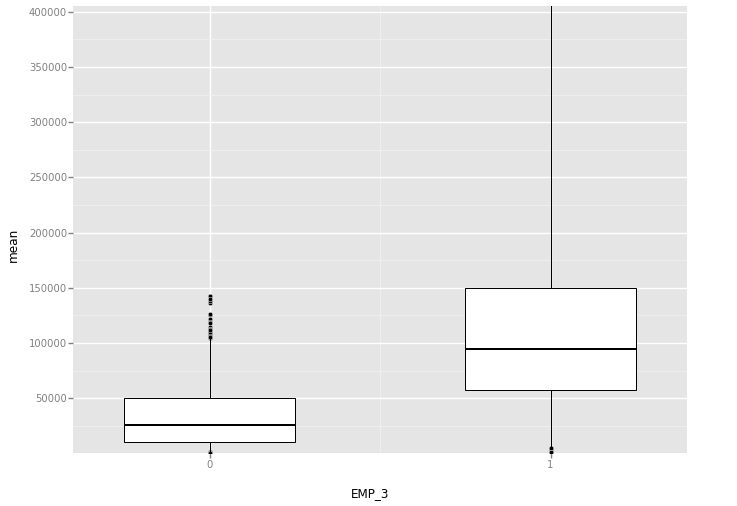

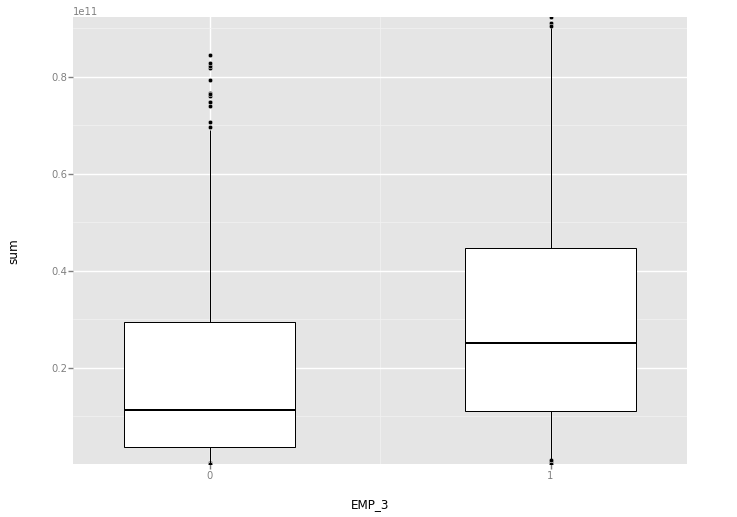

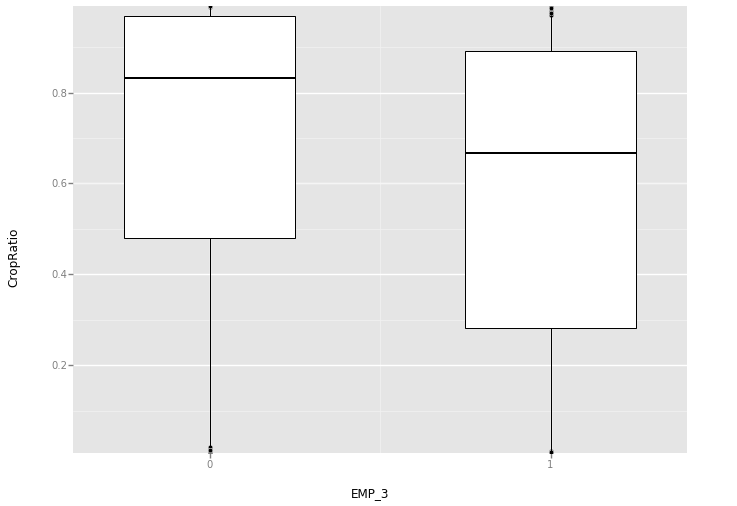

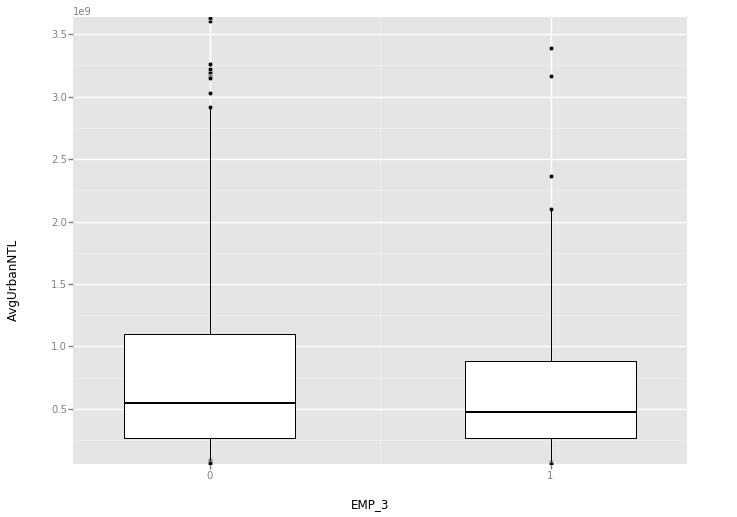

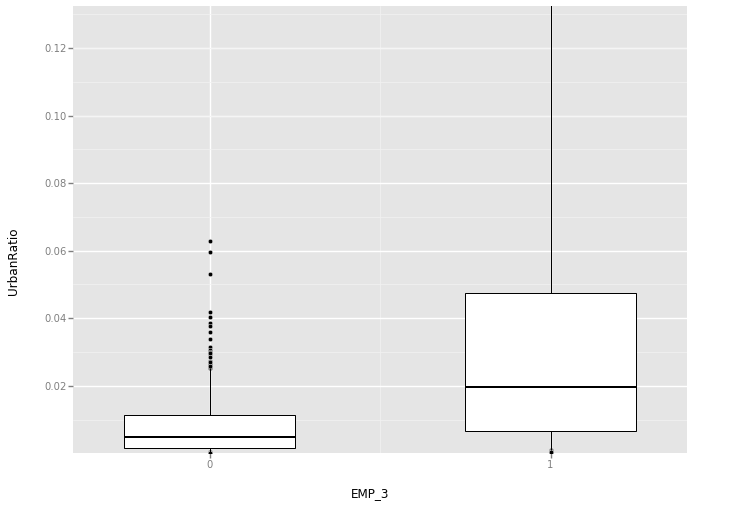

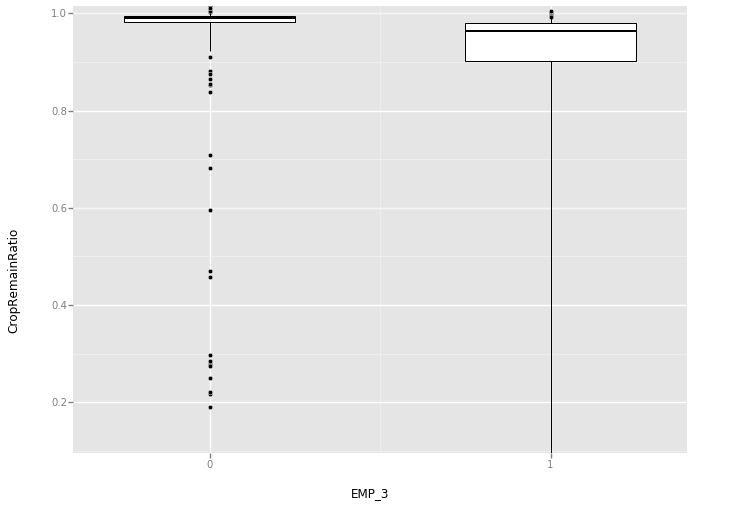

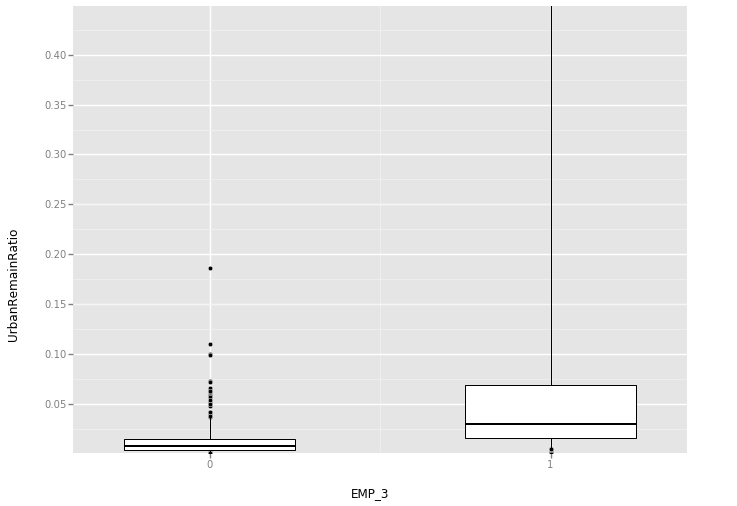

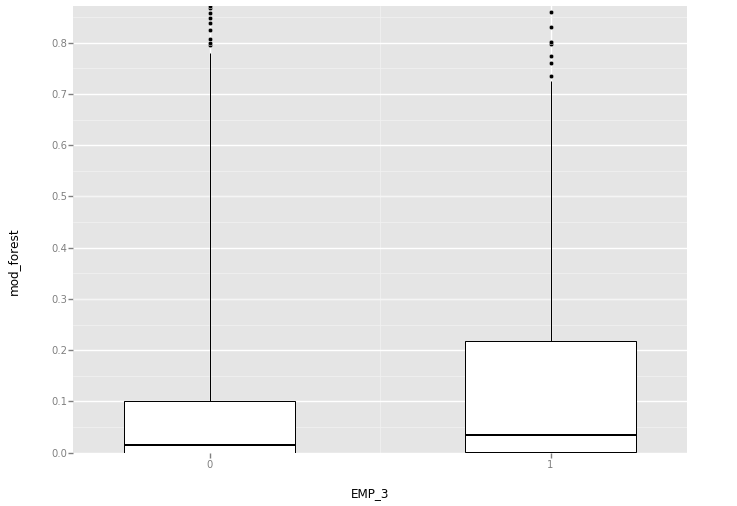

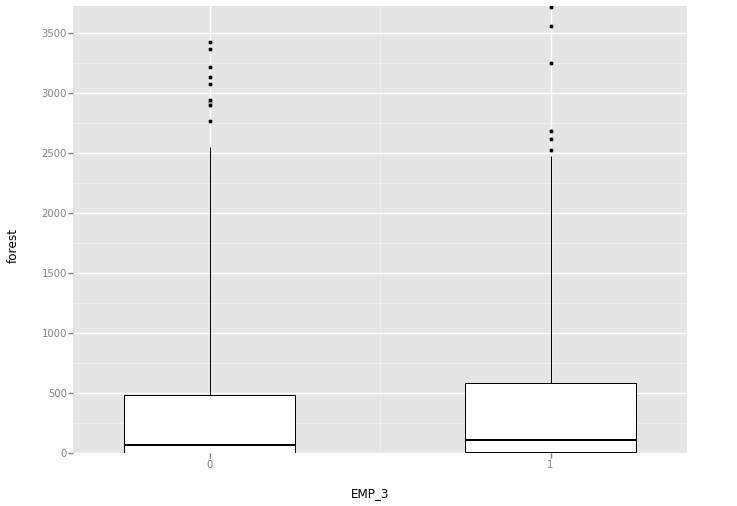

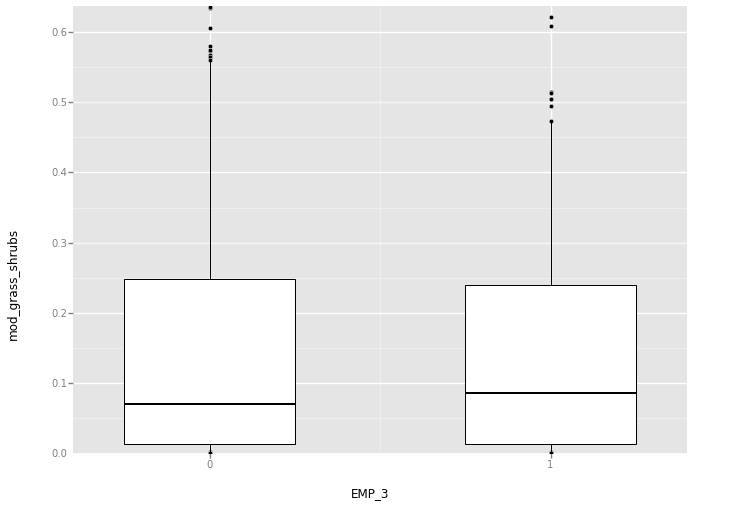

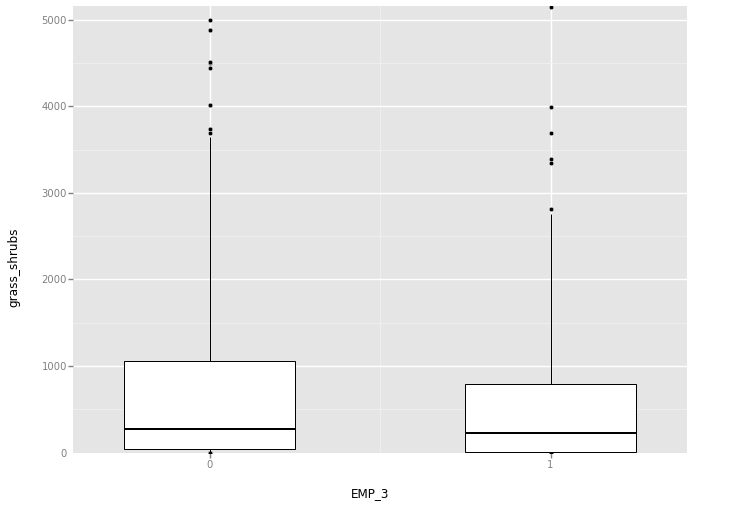

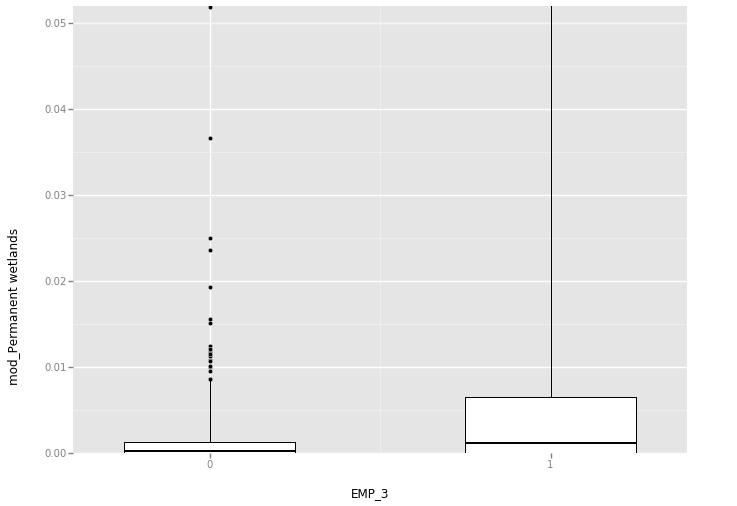

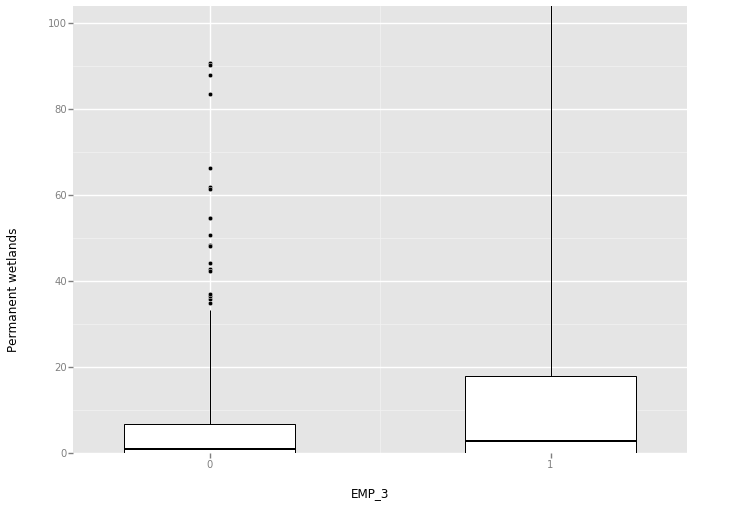

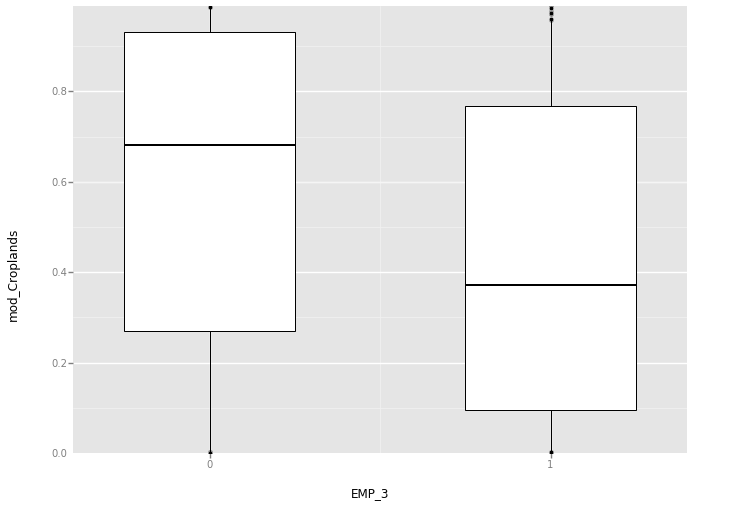

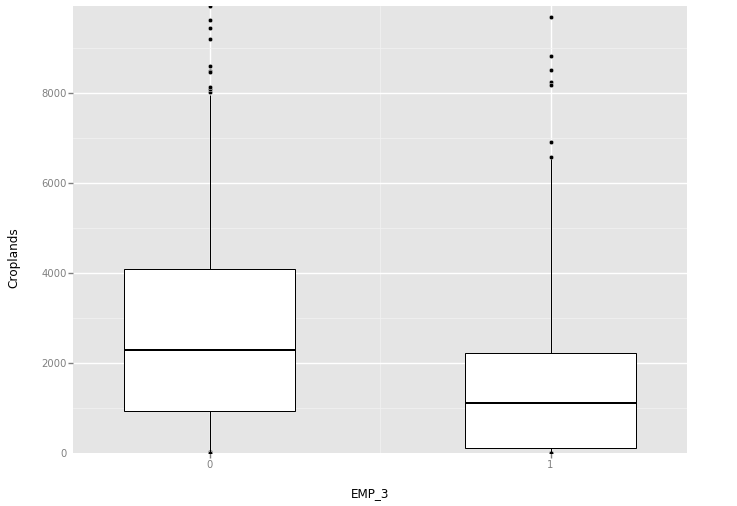

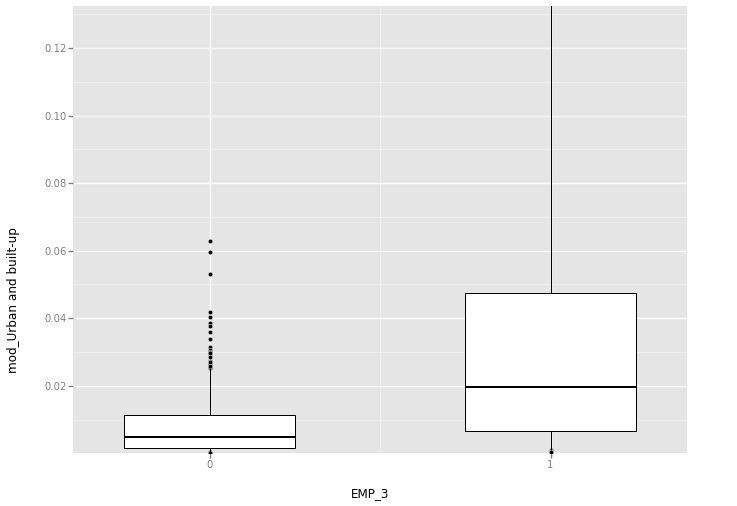

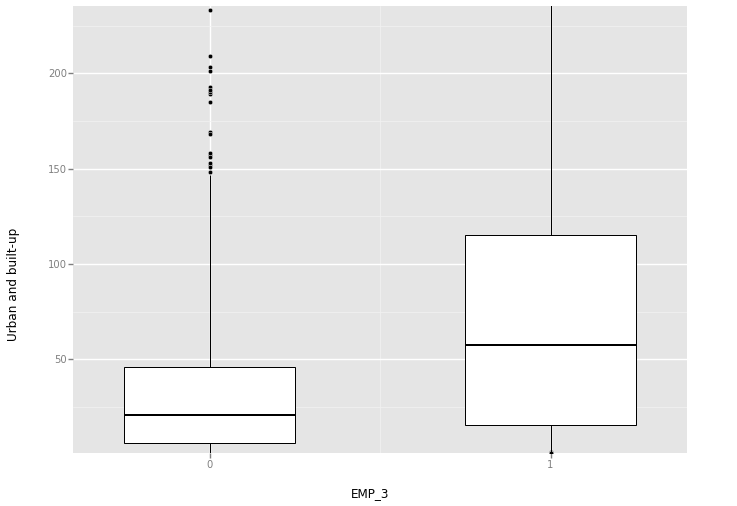

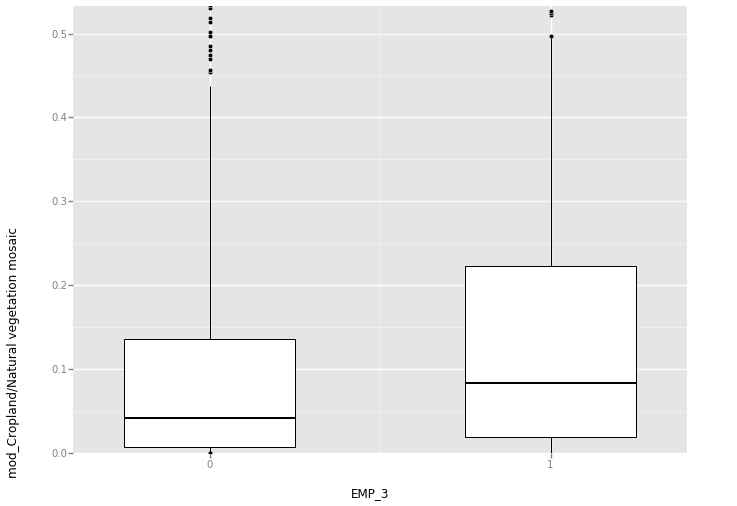

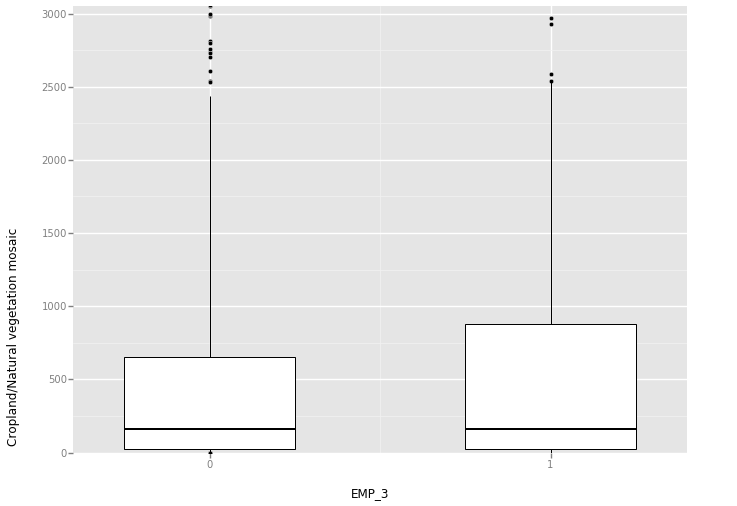

Exception: Invalid column: 'pca_0'
did you mean one of the following:


In [43]:
for feature in var:
    plot = ggplot(df_satData,aes(x=label,y=feature)) + geom_boxplot()+ylim(df_satData[feature].quantile(.025),df_satData[feature].quantile(.975))
    plot.show()

## finding feature ranking for a particular label

In [18]:
def featureRank(label):
    model = LogisticRegression()
    selector = RFE(model,1, step=1)

    X = df_modi_nlPca.values
    X = preprocessing.scale(X)

    y = df_satData.loc[:,label].values

    selector.fit(X,y)

    selectedIdx = selector.get_support(indices=True)

    featureRanking = selector.ranking_

    ranked_var = pd.DataFrame(featureRanking,var)
    ranked_var = ranked_var.reset_index()
    ranked_var.columns = (['var','rank'])
    ranked_var = ranked_var.sort_values('rank')
    ranked_var.reset_index(inplace=True)
    del ranked_var['index']
    
    return ranked_var

## selecting features to maximize f1_score
#### Assumption: Set of first n features in feature ranking will produce maximum f1_score compared to any other set of n features.

In [ ]:
def selectFeatures(ranked_var,label):
    metric_list = list()
    f1_list = list()
    for i in range(len(ranked_var)):
        var2 = ranked_var.loc[:i,'var'].values.tolist()

        X = df_modi_nlPca.loc[:,var2].values
        y = df_satData.loc[:,label].values

        model = LogisticRegression(class_weight='balanced')
        clf = make_pipeline(preprocessing.StandardScaler(),model)
        predicted = cross_validation.cross_val_predict(clf,X,y, cv=5)

        acc = metrics.accuracy_score(y,predicted)
        recall = metrics.recall_score(y,predicted)
        prec =  metrics.precision_score(y,predicted)

        cm = metrics.confusion_matrix(y, predicted)
        cm_score = float(cm[1][1])/(cm[1][1]+cm[1][0]+cm[0][1])

        f1 = metrics.f1_score(y,predicted)

        metric_list.append([f1,cm_score,acc,recall,prec])
        f1_list.append(f1)

    df_metric = pd.DataFrame(metric_list)
    df_metric.columns =  (['f1','cm','acc','recall','prec'])

    ## finding the global maximum index in f1_list
    global_maxima = f1_list.index(max(f1_list))

    ## plotting f1_score with features selected
    #figure()
    #plt.grid()
    #plt.plot(f1_list)
    #plt.title(label)
    #plt.xlabel('number of variables')
    #plt.ylabel('f1_score')
    
    ## finding indexes of all local maximums

    x = np.array(f1_list)
    # for local maxima
    local_maxima = argrelextrema(x, np.greater)[0].tolist()

    f1_acceptable = f1_list[global_maxima]-0.01

    i = 0
    while f1_list[i] < f1_acceptable:
        i += 1

    var_final = ranked_var.loc[:i,'var']

    X = df_modi_nlPca.loc[:,var_final].values
    y = df_satData.loc[:,label].values

    model = LogisticRegression()

    fit = model.fit(X,y)

    df_selecedVar = ranked_var.loc[:i].copy(deep=True)
    df_selecedVar.insert(2,'coeff',fit.coef_[0])

    return [df_selecedVar,f1_list[i],df_metric[i:i+1]]

In [ ]:
select_feature = []
score_metric = []
for label in lis_labelsAll:
    ranked_var = featureRank(label)
    feature_and_score = selectFeatures(ranked_var,label)
    select_feature.append(feature_and_score)
    score_metric.append(feature_and_score[2].values[0])

In [ ]:
df_scoreMetric = pd.DataFrame(score_metric,columns = ['f1','cm','acc','recall','prec'], index=lis_labelsAll)

In [ ]:
df_scoreMetric.to_csv('scoreMetric_pcaModi.csv')

In [ ]:
df_scoreMetric.sort_values(by='f1',ascending=False)

In [ ]:
for feature in mod_features:
    plot = ggplot(df_train,aes(x=label,y=feature)) + geom_boxplot()+ylim(df_train[feature].quantile(.025),df_train[feature].quantile(.975))
    plot.show()

In [ ]:
var

In [34]:
df_modi_nlPca_scaled = preprocessing.scale(df_modi_nlPca.values)

/home/deva/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [37]:
df_modi_nlPca_scaled = pd.DataFrame(df_modi_nlPca_scaled,columns=df_modi_nlPca.columns.tolist())

In [39]:
df_modi_nlPca_scaled.describe()

,mean,sum,CropRatio,AvgUrbanNTL,UrbanRatio,CropRemainRatio,UrbanRemainRatio,mod_forest,forest,mod_grass_shrubs,...,mod_Cropland/Natural vegetation mosaic,Cropland/Natural vegetation mosaic,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,9.020562e-18,-1.908196e-18,2.081668e-18,-5.724587e-18,-4.770490e-18,8.673617e-18,1.051676e-17,-9.714451e-18,1.124101e-16,3.877107e-17,...,2.220446e-17,3.747003e-17,4.683753e-17,1.088539e-17,5.121771e-17,-5.377643e-18,-1.951564e-17,-7.199102e-18,-4.258746e-17,1.561251e-17
std,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,...,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00
min,-6.788806e-01,-8.899519e-01,-1.938699e+00,-7.512633e-01,-2.480579e-01,-4.606298e+00,-3.011603e-01,-5.620384e-01,-5.287405e-01,-8.468846e-01,...,-7.606449e-01,-5.683528e-01,-8.832420e-01,-4.452788e+00,-4.678704e+00,-5.355419e+00,-4.975889e+00,-1.050044e+01,-5.664094e+00,-5.035597e+00
25%,-5.358497e-01,-7.258658e-01,-7.478334e-01,-5.267573e-01,-2.316266e-01,1.643820e-01,-2.640833e-01,-5.611288e-01,-5.278998e-01,-7.784851e-01,...,-7.044070e-01,-5.464270e-01,-7.253840e-01,-2.703883e-01,-2.855805e-01,-5.011982e-01,-5.090125e-01,-2.793946e-01,-4.860687e-01,-2.943366e-01
50%,-2.916753e-01,-3.358246e-01,4.218846e-01,-3.066493e-01,-1.926719e-01,2.394325e-01,-2.226008e-01,-4.811776e-01,-4.500410e-01,-4.308834e-01,...,-4.341898e-01,-4.091623e-01,-4.093324e-01,3.131453e-02,-1.381809e-01,-2.072744e-01,-1.266666e-01,-1.049113e-01,4.245726e-02,7.001219e-02
75%,1.634473e-01,3.147314e-01,8.757508e-01,1.159776e-01,-1.153074e-01,2.728306e-01,-1.322234e-01,-1.736730e-02,9.898009e-03,5.308720e-01,...,2.824140e-01,1.099371e-01,4.601405e-01,1.530473e-01,5.695173e-02,3.417897e-01,4.254394e-01,1.537618e-01,3.882860e-01,3.651589e-01
max,6.066652e+00,6.679492e+00,1.001920e+00,1.187837e+01,8.088792e+00,8.514196e+00,7.282074e+00,3.614909e+00,6.204400e+00,3.861778e+00,...,4.786996e+00,8.716111e+00,5.879551e+00,9.598947e+00,5.184232e+00,1.080333e+01,1.183643e+01,1.945174e+01,1.390509e+01,1.058005e+01
